In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time


CANDLES_PATH = './Data/candles.csv'

days_to_subtract = 5
sec='SBER'
fut=r'SR.3'
multiplier=100

df = pd.read_csv(CANDLES_PATH, sep='\t')
df['t'] = pd.to_datetime(df['datetime'], format='%d.%m.%Y %H:%M')
start_date = datetime.today() - timedelta(days=days_to_subtract)
df = df[df['t'] > np.datetime64(start_date)]
df

,datetime,open,close,high,low,volume,security,class_code,t
1044790,13.03.2023 09:00,42207.0000,42207.0000,42207.0000,42207.000,1,MGM3,SPBFUT,2023-03-13 09:00:00
1044791,13.03.2023 09:00,83.9500,84.2600,84.3100,83.950,1225,BRJ3,SPBFUT,2023-03-13 09:00:00
1044792,13.03.2023 09:00,36689.0000,36737.0000,36737.0000,36689.000,10,RNM3,SPBFUT,2023-03-13 09:00:00
1044793,13.03.2023 09:00,19625.0000,19728.0000,19728.0000,19625.000,15,YNM3,SPBFUT,2023-03-13 09:00:00
1044794,13.03.2023 09:00,75998.0000,75880.0000,75998.0000,75880.000,4368,SiM3,SPBFUT,2023-03-13 09:00:00
...,...,...,...,...,...,...,...,...,...
1316177,17.03.2023 23:49,1075.0000,1074.6000,1075.0000,1074.600,813,NVTK,TQBR,2023-03-17 23:49:00
1316178,17.03.2023 23:49,14566.0000,14560.0000,14566.0000,14560.000,29,GMKN,TQBR,2023-03-17 23:49:00
1316179,17.03.2023 23:49,140.7000,140.6900,140.7500,140.690,271,MTLR,TQBR,2023-03-17 23:49:00
1316180,17.03.2023 23:49,7058.0000,7059.0000,7059.0000,7058.000,34,PHOR,TQBR,2023-03-17 23:49:00


In [2]:
df_filter = df[(df['security'].str.match(fut)) | (df['security']==sec)]
df_filter

,datetime,open,close,high,low,volume,security,class_code,t
1044806,13.03.2023 09:00,17280.00,17344.00,17350.0,17280.00,3551,SRM3,SPBFUT,2023-03-13 09:00:00
1044828,13.03.2023 09:01,17343.00,17336.00,17357.0,17327.00,987,SRM3,SPBFUT,2023-03-13 09:01:00
1044846,13.03.2023 09:02,17341.00,17345.00,17345.0,17333.00,680,SRM3,SPBFUT,2023-03-13 09:02:00
1044862,13.03.2023 09:03,17340.00,17333.00,17345.0,17333.00,658,SRM3,SPBFUT,2023-03-13 09:03:00
1044892,13.03.2023 09:04,17333.00,17334.00,17339.0,17333.00,174,SRM3,SPBFUT,2023-03-13 09:04:00
...,...,...,...,...,...,...,...,...,...
1316061,17.03.2023 23:48,17757.00,17752.00,17762.0,17752.00,133,SRM3,SPBFUT,2023-03-17 23:48:00
1316070,17.03.2023 23:48,193.56,193.51,193.6,193.49,40862,SBER,TQBR,2023-03-17 23:48:00
1316102,17.03.2023 23:48,17757.00,17755.00,17767.0,17752.00,381,SRM3,SPBFUT,2023-03-17 23:48:00
1316133,17.03.2023 23:49,193.55,193.59,193.6,193.48,42014,SBER,TQBR,2023-03-17 23:49:00


In [3]:
df_filter=df_filter[['t','security','open']].drop_duplicates()
df_pivot=df_filter.pivot(index='t', columns='security', values='open').dropna().reset_index()
df_pivot[sec]*=multiplier
df_pivot

security,t,SBER,SRM3
0,2023-03-13 09:59:00,17250.0,17328.0
1,2023-03-13 10:00:00,17253.0,17321.0
2,2023-03-13 10:01:00,17309.0,17333.0
3,2023-03-13 10:02:00,17317.0,17332.0
4,2023-03-13 10:03:00,17301.0,17325.0
...,...,...,...
3895,2023-03-17 23:45:00,19345.0,17747.0
3896,2023-03-17 23:46:00,19348.0,17745.0
3897,2023-03-17 23:47:00,19355.0,17755.0
3898,2023-03-17 23:48:00,19356.0,17757.0


security,t,SBER,SRM3,dSRM3
0,2023-03-13 09:59:00,17250.0,17328.0,78.0
1,2023-03-13 10:00:00,17253.0,17321.0,68.0
2,2023-03-13 10:01:00,17309.0,17333.0,24.0
3,2023-03-13 10:02:00,17317.0,17332.0,15.0
4,2023-03-13 10:03:00,17301.0,17325.0,24.0
...,...,...,...,...
3895,2023-03-17 23:45:00,19345.0,17747.0,-1598.0
3896,2023-03-17 23:46:00,19348.0,17745.0,-1603.0
3897,2023-03-17 23:47:00,19355.0,17755.0,-1600.0
3898,2023-03-17 23:48:00,19356.0,17757.0,-1599.0


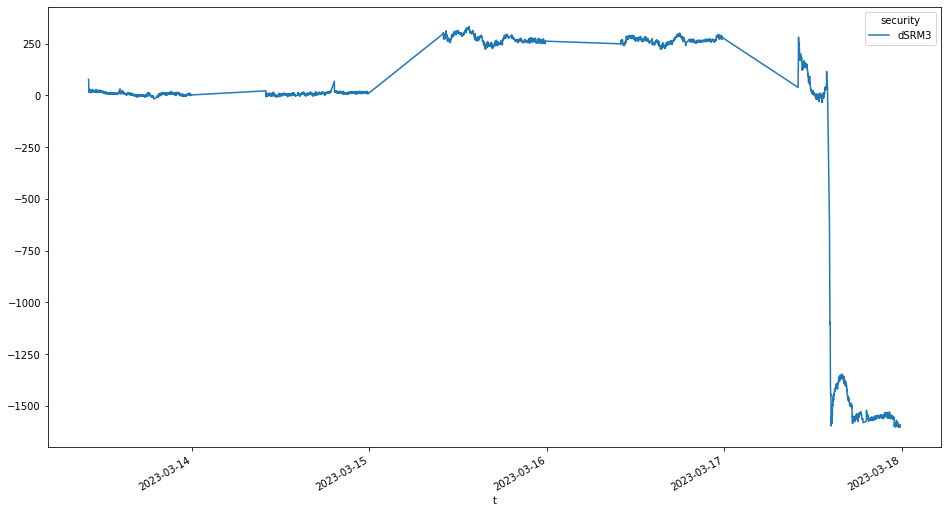

In [4]:
fut_list=set(df_pivot.columns) - set([sec,'t'])
diff_list=[]
for fut in fut_list:
    df_pivot[('d'+fut)] = df_pivot[fut] - df_pivot[sec]  
    diff_list.append(('d'+fut))
    
df_pivot[diff_list+['t']].set_index('t').plot(figsize=(16,9))
df_pivot